In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 14,8


In [11]:
df = pd.read_excel("./../dados/Base WDI - Séries listadas no programa - 1991 a 2019  v01dez2020.xlsx",sheet_name = "Data" )

In [12]:
df.head(2)

,Country Name,Country Code,Series Name,Series Code,1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,..,..,..,..,..,..,...,23.7437,24.3909,22.8107,22.137,20.6343,21.0811,20.4665,20.2528,21.1344,..
1,Afghanistan,AFG,Chemicals (% of value added in manufacturing),NV.MNF.CHEM.ZS.UN,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [13]:
df_alemanha = df.loc[df["Country Name"] == "Germany"]
df_alemanha = df_alemanha.drop(["Country Name","Country Code","Series Code"], axis=1)
df_alemanha = df_alemanha.set_index("Series Name", drop=True)

In [14]:
df_alemanha = df_alemanha.T

In [109]:
print("\nColunas no dataset\n")
[print(coluna) for coluna in df_alemanha.columns]
print("\n")

colunas_interesse_1 = ["GDP growth (annual %)"]

colunas_interesse_2 = ["GNI, PPP (current international $)",
                       "GNI per capita, PPP (current international $)"]

colunas_interesse_3 = ["Agriculture, forestry, and fishing, value added (% of GDP)",
                       "Chemicals (% of value added in manufacturing)",
                       "Industry (including construction), value added (% of GDP)",
                       "Services, value added (% of GDP)",
                       "Manufacturing, value added (% of GDP)",
                       "Food, beverages and tobacco (% of value added in manufacturing)",
                       "Textiles and clothing (% of value added in manufacturing)", 
                       "Machinery and transport equipment (% of value added in manufacturing)",
                       "Other manufacturing (% of value added in manufacturing)",
                       "GDP per capita growth (annual %)",
                       "GDP per person employed (constant 2017 PPP $)"]



Colunas no dataset

Agriculture, forestry, and fishing, value added (% of GDP)
Chemicals (% of value added in manufacturing)
Central government debt, total (% of GDP)
Deposit interest rate (%)
Expense (% of GDP)
Food, beverages and tobacco (% of value added in manufacturing)
GDP growth (annual %)
GNI, PPP (current international $)
GNI per capita, PPP (current international $)
GDP per capita growth (annual %)
GDP per person employed (constant 2017 PPP $)
Industry (including construction), value added (% of GDP)
Inflation, consumer prices (annual %)
Lending interest rate (%)
Manufacturing, value added (% of GDP)
Machinery and transport equipment (% of value added in manufacturing)
Net lending (+) / net borrowing (-) (% of GDP)
Other manufacturing (% of value added in manufacturing)
Population, female
Population, female (% of total population)
Population, male
Population, male (% of total population)
Population, total
Revenue, excluding grants (% of GDP)
Risk premium on lending (lending 

In [138]:
df_interesse = df_alemanha[colunas_interesse_1 + colunas_interesse_2 + colunas_interesse_3].iloc[-12:-1:]

df_interesse

Series Name,GDP growth (annual %),"GNI, PPP (current international $)","GNI per capita, PPP (current international $)","Agriculture, forestry, and fishing, value added (% of GDP)",Chemicals (% of value added in manufacturing),"Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)","Manufacturing, value added (% of GDP)","Food, beverages and tobacco (% of value added in manufacturing)",Textiles and clothing (% of value added in manufacturing),Machinery and transport equipment (% of value added in manufacturing),Other manufacturing (% of value added in manufacturing),GDP per capita growth (annual %),GDP per person employed (constant 2017 PPP $)
2009 [YR2009],-5.69715,3.08626e+12,37680,0.695334,11.8108,24.7358,64.2286,17.6834,8.91299,1.52851,37.074,40.6737,-5.4579,95185.7
2010 [YR2010],4.17897,3.2515e+12,39760,0.803697,11.4278,26.8489,62.2587,19.6952,7.77523,1.42621,39.8559,39.5148,4.33869,98195.3
2011 [YR2011],3.92413,3.50247e+12,43630,0.910022,10.8816,27.069,61.7944,20.233,7.33136,1.448,41.3261,39.013,5.86856,101653
2012 [YR2012],0.419551,3.5709e+12,44400,0.847919,10.5191,27.284,61.6867,20.1564,7.49946,1.38681,41.8858,38.7089,0.231213,101412
2013 [YR2013],0.428243,3.71258e+12,46040,0.942643,10.4389,26.7826,62.1918,19.9252,7.5922,1.36114,42.142,38.4657,0.154548,100807
2014 [YR2014],2.22569,3.88339e+12,47950,0.904548,10.3807,27.011,62.1086,20.2244,7.31486,1.38474,43.3849,37.5347,1.80042,102249
2015 [YR2015],1.73975,3.98377e+12,48770,0.68378,10.3838,27.0646,62.2141,20.3772,7.49108,1.26207,44.1346,36.7284,0.862788,102974
2016 [YR2016],2.23,4.26642e+12,51810,0.698318,10.4619,27.4967,61.8405,20.7437,7.56214,1.23593,44.4831,36.2569,1.4081,103593
2017 [YR2017],2.46503,4.49392e+12,54370,0.831436,10.2885,27.4421,61.783,20.5621,7.48472,1.23883,44.4936,36.4943,2.08281,105160
2018 [YR2018],1.52745,4.64107e+12,55980,0.768635,10.2885,27.4617,61.8407,20.4036,7.48472,1.23883,44.4936,36.4943,1.22279,105705


In [139]:
anos = [int(ano[:4]) for ano in list(df_interesse.index)]

df_interesse.index=anos

df_interesse.replace("..", np.NaN, inplace = True)

df_interesse = pd.DataFrame(df_interesse, dtype=float)


In [140]:
df_interesse.head(2)

Series Name,GDP growth (annual %),"GNI, PPP (current international $)","GNI per capita, PPP (current international $)","Agriculture, forestry, and fishing, value added (% of GDP)",Chemicals (% of value added in manufacturing),"Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)","Manufacturing, value added (% of GDP)","Food, beverages and tobacco (% of value added in manufacturing)",Textiles and clothing (% of value added in manufacturing),Machinery and transport equipment (% of value added in manufacturing),Other manufacturing (% of value added in manufacturing),GDP per capita growth (annual %),GDP per person employed (constant 2017 PPP $)
2009,-5.697152,3.086257e+12,37680.0,0.695334,11.810820,24.735805,64.228553,17.683350,8.912990,1.528512,37.073986,40.673692,-5.457901,95185.714095
2010,4.178969,3.251502e+12,39760.0,0.803697,11.427787,26.848893,62.258657,19.695211,7.775234,1.426211,39.855926,39.514843,4.338692,98195.346832


# Crescimento percentual real do PIB por ano

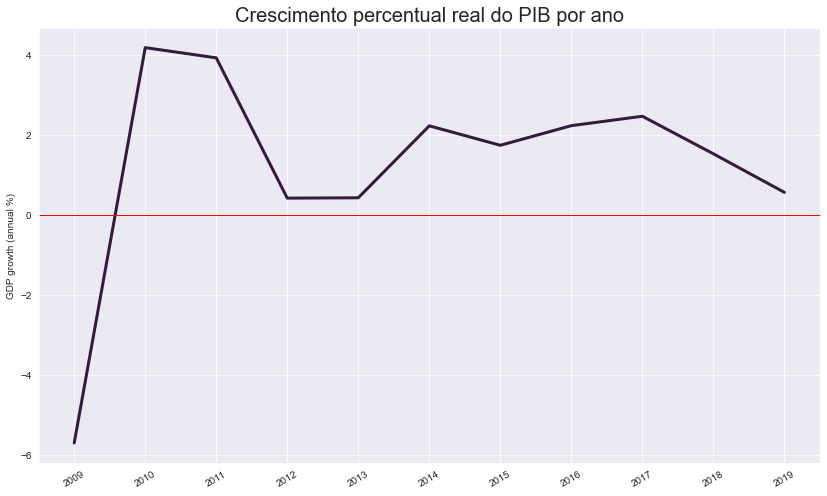

In [141]:
sns.set_style("darkgrid")
sns.set_palette("rocket")

plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse,x=df_interesse.index,y="GDP growth (annual %)", linewidth=3)

graph.axhline(0, color = "r",linewidth=1)

graph.set_title('Crescimento percentual real do PIB por ano', fontsize=20)

plt.savefig('./../graficos/cresc_pib_real.png')

plt.show()

# Analise RNB

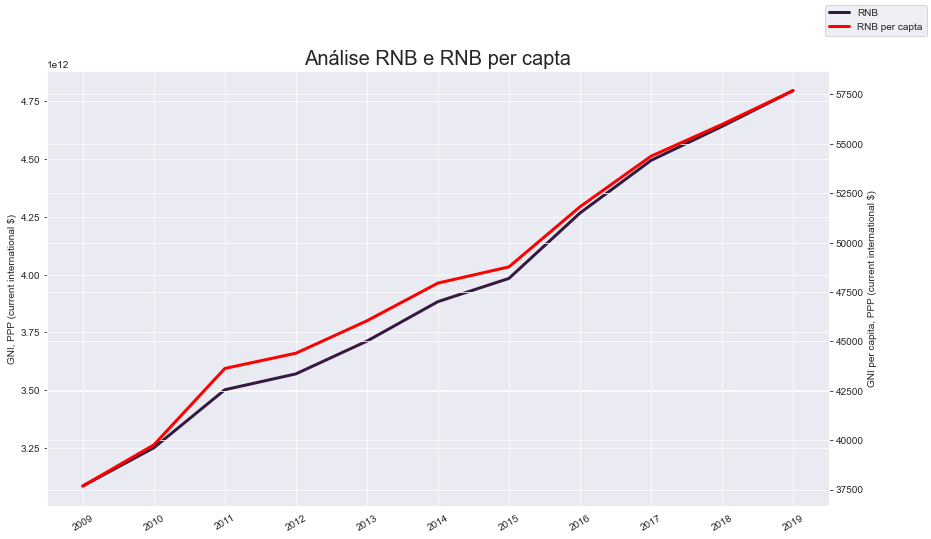

In [143]:
sns.set_style("darkgrid")
sns.set_palette("rocket")

plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse["GNI, PPP (current international $)"],
                     linewidth=3,
                     label="RNB",
                     legend=False)

ax2 = graph.twinx()

sns.lineplot(data=df_interesse["GNI per capita, PPP (current international $)"],
             linewidth=3,
             label="RNB per capta", 
             color = "red",
             legend=False)



graph.figure.legend()

graph.set_title('Análise RNB e RNB per capta', fontsize=20)

plt.savefig('./../graficos/analise_rnb.png')

plt.show()

# Composicao setorial da economia e produtividade

Parcela da agricultura no PIB               -- Parcela da agricultura no PIB 

Parcela da agricultura no PIB               -- Industry, value added (% of GDP)

Parcela de serviços no PIB                  -- Services, value added (% of GDP)

Parcela da ind. manufatureira no PIB        -- Manufacturing, value added (% of GDP) 

Parcela dos setores de alimentos, bebidas e -- Food, beverages and tobacco (% of value added in 
tabaco na manufatura                           manufacturing) 

Parcela do setor têxtil na manufatura       -- Textiles and clothing (% of value added in manufacturing)

Parcela dos setores de maquinário e         -- Machinery and transport equipment (% of value added in 
equipamentos de transp. na manufatura          manufacturing)

Parcela do setor de produtos químicos       -- Chemicals (% of value added in manufacturing)
na manuf

Parcela de outros setores na manufatura     -- Other manufacturing (% of value added in manufacturing)

Estrutura da pauta de exportações           -- Checar https://atlas.cid.harvard.edu/

Taxa de crescimento do PIB per capita       -- GDP per capita growth (annual %) 

GDP per capita growth (annual %)            -- GDP per person employed (constant 2017 PPP $) 




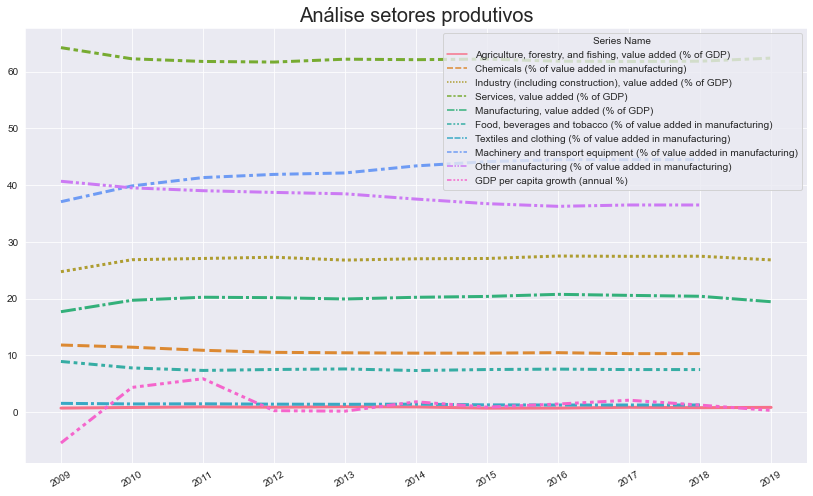

In [155]:
sns.set_style("darkgrid")
sns.set_palette("rocket")

plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse[colunas_interesse_3].drop('GDP per person employed (constant 2017 PPP $)', axis=1),
                     linewidth=3,
                     legend=True)

#graph.figure.legend()

graph.set_title('Análise setores produtivos', fontsize=20)

plt.savefig('./../graficos/setores_produtivos.png')

plt.show()

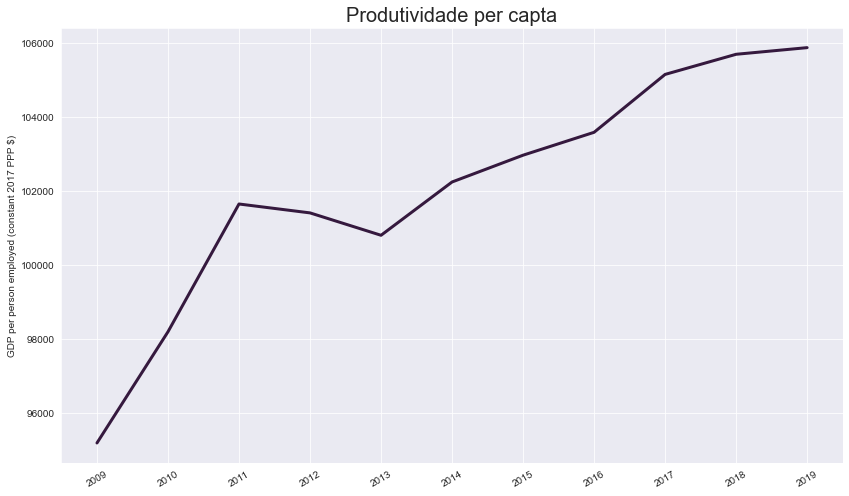

In [158]:
sns.set_style("darkgrid")
sns.set_palette("rocket")

plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse['GDP per person employed (constant 2017 PPP $)'],
                     linewidth=3,
                     legend=True)

graph.set_title('Produtividade per capta', fontsize=20)

plt.savefig('./../graficos/produtividade_.png')

plt.show()